# 딥러닝 라이브러리 2가지
## 1. Tensorflow(구글) - 산업용
* 이미지 관련 라이브러리
* keras라는 라이브러리를 이용해 코딩이 쉬움
* 순차적, 함수적, 클래스
## 2. PyTorch(메타) - 연구용
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인
* 무조건 클래스 기반
* https://pytorch.org/get-started/locally/#windows-installation

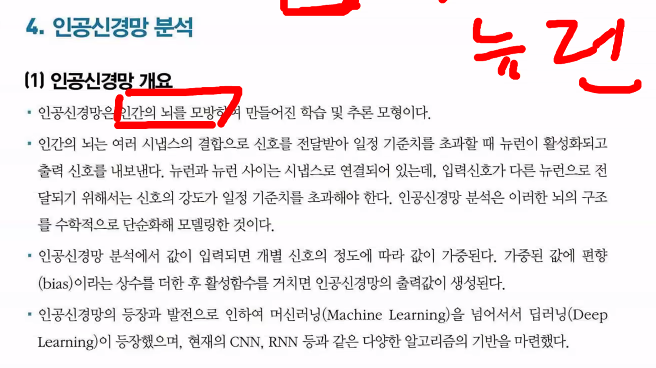
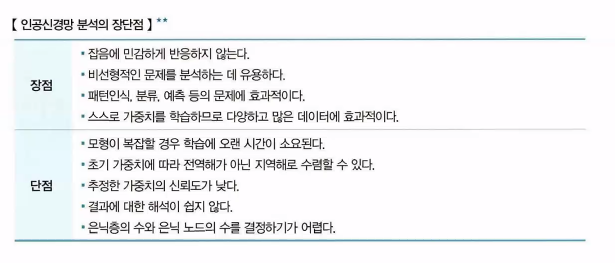
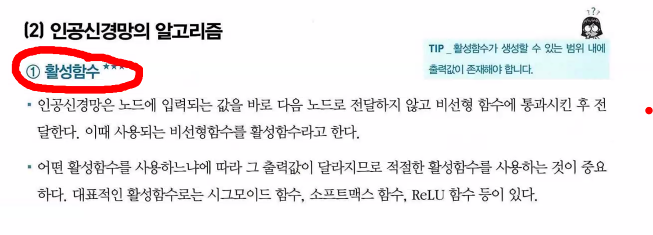
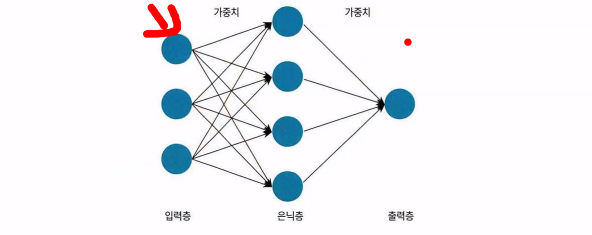
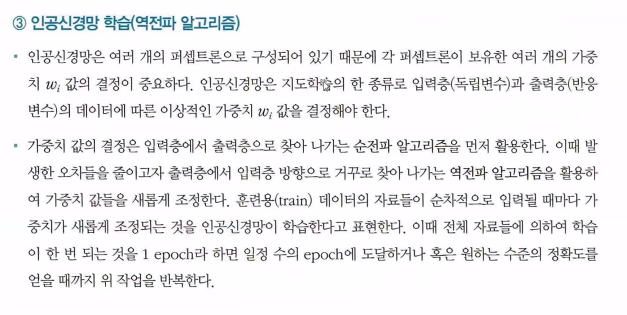
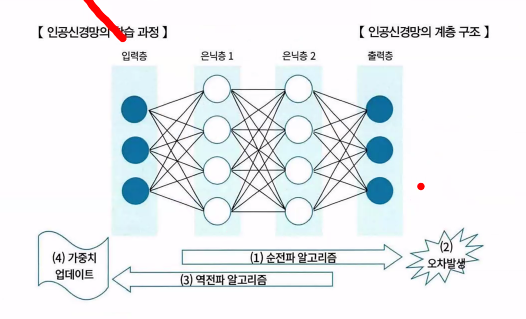
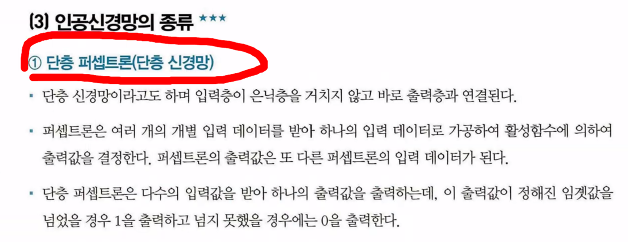
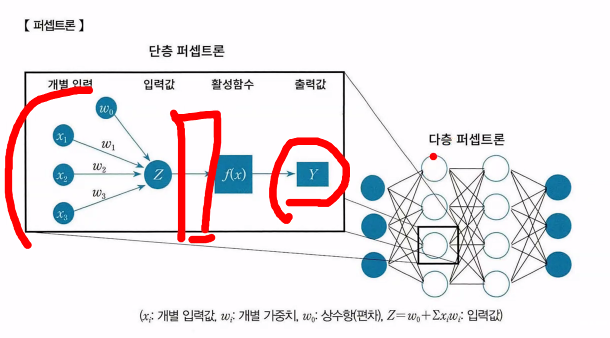

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [8]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
raw_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data = raw_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [10]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [11]:
data['family'] = data['SibSp'] + data['Parch']

/tmp/ipykernel_1483/3785938369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family'] = data['SibSp'] + data['Parch']


In [14]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

/tmp/ipykernel_1483/1825461941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [16]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

/tmp/ipykernel_1483/1548492273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(data['Age'].mean())


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
 7   family    891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [18]:
data = data.drop(['SibSp','Parch'], axis=1)

In [19]:
data = pd.get_dummies(data, drop_first=True)
data

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,True,False,True
1,1,1,38.000000,1,False,False,False
2,1,3,26.000000,0,False,False,True
3,1,1,35.000000,1,False,False,True
4,0,3,35.000000,0,True,False,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,True,False,True
887,1,1,19.000000,0,False,False,True
888,0,3,29.699118,3,False,False,True
889,1,1,26.000000,0,True,False,False


In [20]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

# 딥러닝 시에도 데이터의 스케일을 맞춰 주는 것이 좋음
* 주로 StandardScaler나 MinMaxScaler 사용, 이상값이 많을 경우는 RobustScaler 사용
* 이진분류(0,1) : MinMaxScaler
* 연속값예측 : StandardScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mms = MinMaxScaler()
mms_X_train = pd.DataFrame(mms.fit_transform(X_train), columns=X.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms.transform(X_test), columns=X.columns, index=X_test.index)
display(mms_X_train)
display(mms_X_test)

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
748,0.0,0.233476,0.1,1.0,0.0,1.0
45,1.0,0.367921,0.0,1.0,0.0,1.0
28,1.0,0.367921,0.0,0.0,1.0,0.0
633,0.0,0.367921,0.0,1.0,0.0,1.0
403,1.0,0.346569,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...
476,0.5,0.421965,0.1,1.0,0.0,1.0
190,0.5,0.396833,0.0,0.0,0.0,1.0
736,1.0,0.597889,0.4,0.0,0.0,1.0
462,0.0,0.585323,0.0,1.0,0.0,1.0


,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
625,0.0,0.761247,0.0,1.0,0.0,1.0
566,1.0,0.233476,0.0,1.0,0.0,1.0
459,1.0,0.367921,0.0,1.0,1.0,0.0
804,1.0,0.334004,0.0,1.0,0.0,1.0
338,1.0,0.560191,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
184,1.0,0.044986,0.2,0.0,0.0,1.0
607,0.0,0.334004,0.0,1.0,0.0,1.0
624,1.0,0.258608,0.0,1.0,0.0,1.0
103,1.0,0.409399,0.0,1.0,0.0,1.0


## Tensorflow Sequential API 사용한 순차적 모델 생성 및 분석
* Sequential : 인공신경망을 순차적으로 작성할 때 사용
* Dense : 층, 레이어
1) 신경망 모델 정의
2) 신경망 모델 훈련
3) 훈련된 모델로 테스트
4) 검증

In [30]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 신경망 모델 주의사항
* 입력층은 반드시 독립변수 수(input_dim)를 정확히 지정
* 신경망 모델의 은닉층은 2~3개 정도로 한다
* Dense의 노드 수는 2의 배수로 지정 2 4 8 16 256
* Dense의 노드는 큰 수에서 작은 수로 줄여나간다
* 은닉층의 활성화 함수 : ReLU
* 출력층은 이진분류일 경우 sigmoid, 다중분류일 경우 softmax
* 회귀분석일 경우 (종속변수가 연속(수치)형인 경우) 출력층에 활성화 함수 없이 노드를 1로 지정

In [31]:
# 신경망 모델 정의 keras 3.0 tensorflow 2.19 기준
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],))) # 입력층
model.add(Dense(64, activation='relu')) # 은닉층
model.add(Dense(32, activation='relu')) # 은닉층
model.add(Dense(16, activation='relu')) # 은닉층
model.add(Dense(1, activation='sigmoid')) # 출력층 / 이진분류이므로 sigmoid

## 모델의 파라미터 세팅 model.compile()
* loss : 오차 계산 지표
    * 이진분류 : binary_crossentropy
    * 다중분류 : categorical_crossentropy
    * 데이터에 0이 많은 희소행렬인 경우 : sparse_categorical_crossentropy
    * 연속형 데이터(회귀분석) : mse
* optimizer : learning_rate
    * adam을 가장 많이 사용
* metrics : 평가지표 accuracy

In [33]:
# 모델의 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련 model.fit(X_train, y_train)
* epochs : 전체 데이터를 한번 훈련하는 주기, 10~100 사이
* batch_size : 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절 (2의 배수) - 32, 64로 쪼개서 넣는 것 추천
* validation_data : 검증 데이터로 모델 검증 실시

In [34]:
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(mms_X_test, y_test))

Epoch 1/100


I0000 00:00:1747201410.882394    1692 service.cc:152] XLA service 0x7fc59000b280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747201410.882426    1692 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-14 14:43:30.934169: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747201411.178777    1692 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3125 - loss: 0.7159

I0000 00:00:1747201412.533711    1692 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.6074 - loss: 0.6806 - val_accuracy: 0.7127 - val_loss: 0.6345
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7032 - loss: 0.6249 - val_accuracy: 0.7649 - val_loss: 0.5902
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7804 - loss: 0.5809 - val_accuracy: 0.7873 - val_loss: 0.5352
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7858 - loss: 0.5170 - val_accuracy: 0.7724 - val_loss: 0.4910
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7766 - loss: 0.4964 - val_accuracy: 0.8022 - val_loss: 0.4770
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7760 - loss: 0.4825 - val_accuracy: 0.7799 - val_loss: 0.4657
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7815 - loss: 0.4681 - val_accuracy: 0.8097 - val_loss: 0.4598
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8088 - loss: 0.4549 - val_accuracy: 0.7761 - val_loss: 0

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8370 - loss: 0.4088 - val_accuracy: 0.8097 - val_loss: 0.4251
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8473 - loss: 0.3736 - val_accuracy: 0.7985 - val_loss: 0.4263
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8084 - loss: 0.4245 - val_accuracy: 0.7985 - val_loss: 0.4257
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8427 - loss: 0.4095 - val_accuracy: 0.7910 - val_loss: 0.4329
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7966 - loss: 0.4411 - val_accuracy: 0.8209 - val_loss: 0.4244
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8248 - loss: 0.3920 - val_accuracy: 0.7948 - val_loss: 0.4367
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8274 - loss: 0.3981 - val_accuracy: 0.8060 - val_loss: 0.4289
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8285 - loss: 0.3970 - val_accuracy: 0.8022 - val_l

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음
* accuracy와 loss 간의 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [35]:
score = model.evaluate(mms_X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8129 - loss: 0.4278 
test loss 0.4316073954105377
test accuracy 0.8059701323509216


In [36]:
history.history['loss']

[0.6639713048934937,
 0.6153499484062195,
 0.5652128458023071,
 0.5108211040496826,
 0.4804735481739044,
 0.46842822432518005,
 0.46292123198509216,
 0.4572795629501343,
 0.45135849714279175,
 0.4474526345729828,
 0.4437604248523712,
 0.44208410382270813,
 0.44042640924453735,
 0.43703606724739075,
 0.4367718994617462,
 0.43507495522499084,
 0.4306075870990753,
 0.4303063154220581,
 0.4266960024833679,
 0.42711785435676575,
 0.4259509742259979,
 0.42108556628227234,
 0.42489197850227356,
 0.42260581254959106,
 0.4203351140022278,
 0.42411738634109497,
 0.4198729395866394,
 0.41863924264907837,
 0.4183039665222168,
 0.4171236753463745,
 0.4139072299003601,
 0.4157278835773468,
 0.41468265652656555,
 0.4159579575061798,
 0.4181080758571625,
 0.41250619292259216,
 0.4135178029537201,
 0.41035526990890503,
 0.41146326065063477,
 0.4132990837097168,
 0.4146823585033417,
 0.41069352626800537,
 0.40995654463768005,
 0.41150927543640137,
 0.4110372066497803,
 0.41276463866233826,
 0.4141003191

## 훈련 결과 시각화하기 
## history.history['loss'], history.history['val_loss']

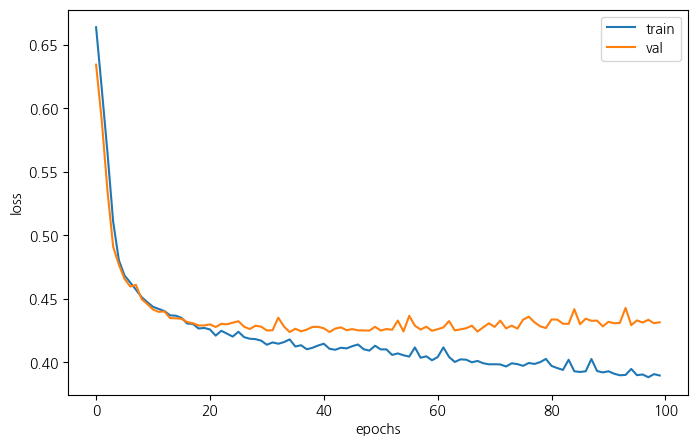

In [37]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델의 예측 값 출력

In [38]:
pred = model.predict(mms_X_test)
pred # 확률

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.227462  ],
       [0.14703257],
       [0.12341668],
       [0.11457676],
       [0.06187604],
       [0.30179012],
       [0.10804327],
       [0.87915   ],
       [0.10418714],
       [0.95831484],
       [0.7870996 ],
       [0.9940615 ],
       [0.34226713],
       [0.22604325],
       [0.593482  ],
       [0.7436812 ],
       [0.12341668],
       [0.36865902],
       [0.9265504 ],
       [0.36930636],
       [0.06010898],
       [0.06482218],
       [0.48001733],
       [0.11457676],
       [0.24641736],
       [0.1180903 ],
       [0.978605  ],
       [0.27717966],
       [0.21887241],
       [0.2503189 ],
       [0.8791929 ],
       [0.9556133 ],
       [0.12341668],
       [0.78622544],
       [0.99004155],
       [0.49219725],
       [0.12341668],
       [0.06358668],
       [0.12341668],
       [0.31657895],
       [0.10804327],
       [0.847817  ],
       [0.29434803],
       [0.9901017 ],
       [0.98739487],
       [0.1154753 ],
       [0.49141172],
       [0.266

In [45]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred.flatten()))

In [46]:
result

,y_test,pred
625,0,0.227462
566,0,0.147033
459,0,0.123417
804,1,0.114577
338,1,0.061876
...,...,...
184,1,0.678831
607,1,0.376781
624,0,0.138079
103,0,0.093940


In [48]:
result['pred'] = result['pred'].apply(lambda x : 1 if x > 0.5 else 0)

In [49]:
result

,y_test,pred
625,0,0
566,0,0
459,0,0
804,1,0
338,1,0
...,...,...
184,1,1
607,1,0
624,0,0
103,0,0


In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(result['y_test'], result['pred']))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.80      0.66      0.72       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [52]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
for i in range(1,11):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=42)
    dtc.fit(mms_X_train, y_train)
    pred2 = dtc.predict(mms_X_test)
    print('='*30, i,'='*30)
    print(classification_report(y_test, pred2))

============================== 1 ==============================
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268

============================== 2 ==============================
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       165
           1       0.70      0.70      0.70       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

============================== 3 ==============================
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73  

In [57]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(mms_X_train, y_train)
pred2 = dtc.predict(mms_X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



# Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러개 쌓는 형태라 복잡한 모델 생성에 한계가 있음
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output) 등 복잡한 모델을 정의할 수 있음
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력을 정의

In [59]:
# tensorflow 2.19 버전용
from keras.layers import Input, Dense
from keras.models import Model

In [60]:
# 입력층
inputs = Input(shape=(mms_X_train.shape[1],))

# 은닉층
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# 출력층
outputs = Dense(1, activation='sigmoid')(x)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)
model.summaryary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x>0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5867 - loss: 0.6685 - val_accuracy: 0.6567 - val_loss: 0.6165
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6849 - loss: 0.5929 - val_accuracy: 0.6791 - val_loss: 0.5663
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7277 - loss: 0.5599 - val_accuracy: 0.7761 - val_loss: 0.5264
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7845 - loss: 0.5128 - val_accuracy: 0.7761 - val_loss: 0.5035
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7673 - loss: 0.5171 - val_accuracy: 0.7761 - val_loss: 0.4874
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8037 - loss: 0.4566 - val_accuracy: 0.7761 - val_loss: 0.4780
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7854 - loss: 0.4585 - val_accuracy: 0.7985 - val_loss: 0.4646
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7701 - loss: 0.4882 - val_accuracy: 0.8060 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8156 - loss: 0.4203 - val_accuracy: 0.8172 - val_loss: 0.4265
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8388 - loss: 0.3961 - val_accuracy: 0.7910 - val_loss: 0.4372
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8562 - loss: 0.3657 - val_accuracy: 0.8134 - val_loss: 0.4315
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4132 - val_accuracy: 0.8097 - val_loss: 0.4262
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8441 - loss: 0.3934 - val_accuracy: 0.7985 - val_loss: 0.4330
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8620 - loss: 0.3711 - val_accuracy: 0.7799 - val_loss: 0.4400
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4140 - val_accuracy: 0.8134 - val_loss: 0.4307
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8368 - loss: 0.3916 - val_accuracy: 0.7948 - val_lo

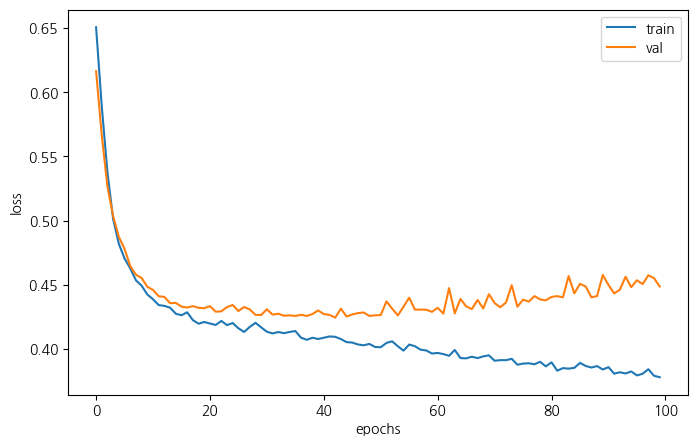

In [63]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# class형으로 만들기 (Model Subclass API)
* class 형태의 모델 정의 방법
* keras의 Model을 상속받아 작성

In [69]:
class Titanic(Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(32, activation='relu')
        self.dense4 = Dense(16, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.classifier(x)

In [70]:
model = Titanic()
print(model.summary())

Model: "titanic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100,
                   batch_size=32, validation_data=(mms_X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7212 - loss: 0.6456 - val_accuracy: 0.8134 - val_loss: 0.5713
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.5262 - val_accuracy: 0.7761 - val_loss: 0.5074
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7875 - loss: 0.4956 - val_accuracy: 0.7761 - val_loss: 0.4765
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7811 - loss: 0.4861 - val_accuracy: 0.8134 - val_loss: 0.4648
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8065 - loss: 0.4745 - val_accuracy: 0.8172 - val_loss: 0.4521
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8158 - loss: 0.4419 - val_accuracy: 0.7985 - val_loss: 0.4526
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8114 - loss: 0.4178 - val_accuracy: 0.7799 - val_loss: 0.4499
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8089 - loss: 0.4435 - val_accuracy: 0.8172 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.3804 - val_accuracy: 0.7910 - val_loss: 0.4483
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8273 - loss: 0.4190 - val_accuracy: 0.7836 - val_loss: 0.4517
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8401 - loss: 0.3844 - val_accuracy: 0.8246 - val_loss: 0.4284
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8527 - loss: 0.3608 - val_accuracy: 0.8284 - val_loss: 0.4260
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8048 - loss: 0.4336 - val_accuracy: 0.8209 - val_loss: 0.4251
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8337 - loss: 0.3906 - val_accuracy: 0.8022 - val_loss: 0.4274
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8288 - loss: 0.3833 - val_accuracy: 0.8022 - val_loss: 0.4335
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8308 - loss: 0.3758 - val_accuracy: 0.8134 - val_lo

In [72]:
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x>0.5 else 0)
print(classification_report(y_test, pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.81      0.65      0.72       103

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



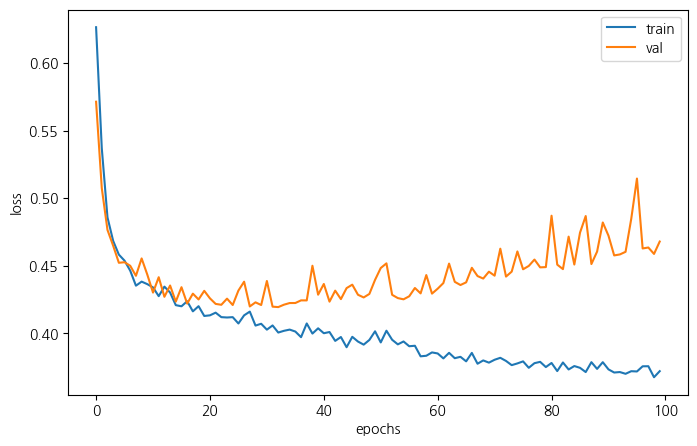

In [73]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [74]:
print(model.summary())

Model: "titanic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,333 (138.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,556 (92.02 KB)

None
